In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH274 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. KS_3_Class.ipynb <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced!<br>
<div/>

# Plotting With Matplotlib

# 0.1. Introduction.
Many Python packages can be used for plotting data (including, but not limited to, Bokeh, Seaborn, ggplot, Plotly, $etc.$), but [Matplotlib](https://matplotlib.org) is probably the most popular. It is a hugely versatile package, allowing users to produce high-quality figures suitable for publication in journals, books, and theses. This key skills workshop will introduce some of the functionality of the Matplotlib module, and builds upon your existing knowledge of the NumPy module,loop structures, and file input/output syntax within Python.

Section 1. and the first part of section 2. introduce the core concepts of Matplotlib plotting, and you should aim to complete as much of this material as possible today. Section 2.1 onwards is useful to know, but not essential. It is unlikely that you will get onto this material today, but you should still attempt it in your own time.

## 0.1. Loading the required packages
As with all Python programming, the first step is load all of the optional modules we will need. For this workshop we will use both the Matplotlib module, and NumPy (the fundamental Python package for scientific computing). In order to display Matplotlib plots within a Jupyter notebook we also need to include a "Magic command".

In [38]:
#this 'magic command' is needed to display plots within a Jupyter notebook
%matplotlib inline 

#import Numpy (np) and Matplotlib (plt)
import matplotlib.pyplot as plt
import numpy as np

# 1. Basic Plotting
## 1.1 Pylab interface
Simple plots can be created very quickly using the MATLAB-like commands supported by pylab: 

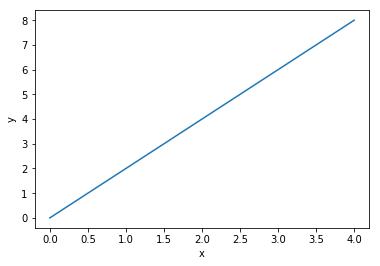

In [39]:
#create some simple data
x=np.array([0,1,2,3,4]) #defining x as a NumPy array allows us to manipulate it mathematically
y=2*x 

#plot data as a line graph
plt.plot(x,y)

#add axis labels
plt.xlabel("x")
plt.ylabel("y")

#display the graph
plt.show()

To plot multiple lines on the same graph, we can use mulitple plot commands. The lines are automatically given different colours.

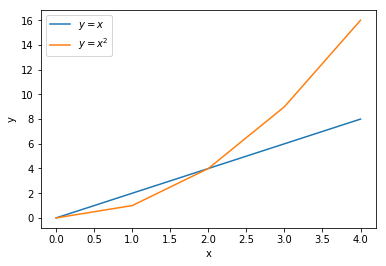

In [40]:
y1=x**2 #'x' and 'y' were defined above

plt.plot(x,y,label="$y=x$") #'label="..."' used to create a plot legend. Enclosing the label text between a pair
plt.plot(x,y1,label="$y=x^2$") #of '$' symbols allows us to use the mathematical typesetting capabilities of LaTeX

plt.xlabel('x')
plt.ylabel('y')

#add a plot legend
plt.legend()

plt.show()

We can manually change the appearance of plots (colour, symbol, $etc.$) through optional instructions:

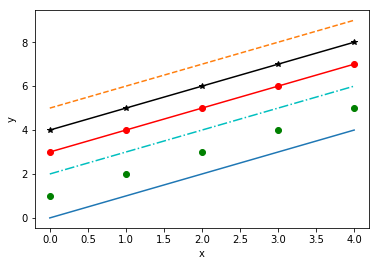

In [41]:
#series of plots with differing line styles
plt.plot(x,x) #i.e. a plot of y=x with default styling
plt.plot(x,x+1,'go') # y=x+1, g=green, o=round points
plt.plot(x,x+2,'c-.') #c= cyan, -.= dash-dot line
plt.plot(x,x+3,'r-o') #r=red, -o= solid line with round points
plt.plot(x,x+4,'k-*') #k=black, -*=solid line with star-shaped points
plt.plot(x,x+5,'--') #--=dashed line

plt.xlabel("x")
plt.ylabel("y")
plt.show()

<div class=warn>

### <font>Task 1:</font>
Produce a line plot of the function $y(x)=x^3$, with $x=-10, -9,8,\ldots,8,9,10$ in the code cell below. Remember to label your axes and include a plot legend.

<b> Helpful tip:</b> ```x=np.arange(start,stop,step)``` can automatically create your x-data for you.
<a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html#numpy.arange">Click here</a> to read the help file (note especially the information about the stop parameter). 

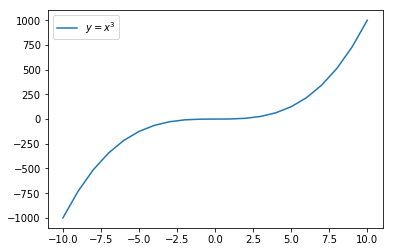

In [8]:
#Task 1 answer
x=np.arange(-10,11,1)
y=x**3

plt.plot(x,y,label="$y=x^{3}$")
plt.legend()
plt.show()

<div class=warn>

### <font >Task 2:</font>
Repeat the above, but superimpose the data points on the line. Make the data points red, and the line cyan. Include a legend and axis labels on your plot

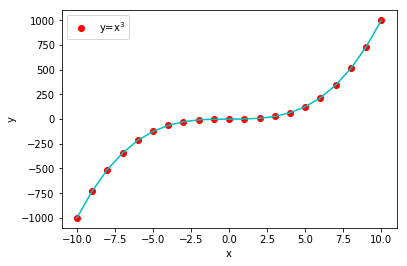

In [9]:
#Task 2 answer
#plt.plot(x,y,x,y,'o')
plt.plot(x,y,'ro',label="y=x$^3$")
plt.plot(x,y,'c-')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

## 1.1. Importing data
Oftentimes we want to graph the data produced during an experiment, rather than plot mathematical functions. This often requires that we are able to read in data from a text file (```.txt```, ```.csv```, and ```.dat``` are common text filetypes). Numpy provides us with several options for reading data from such files.

The easiest method is to use ```np.loadtxt('filename')```. This command will load the file specified by the ```'filename'``` argument. If the file to be read is in a different directory from your Jupyter notebook, then you need to include the directory path in this argument. By default, ```np.loadtxt``` looks for whitespace (spaces, tabs) to signify the separation between columns in the data. To read a comma-separated (```.csv```) file we need to include the optional argument ```delimiter=','```.

In [10]:
#File input example:
#Read in 'IRdata.csv' from 'STUFF' folder (in the same directory as python notebook)
#when reading a .csv file we need to inculde the delimiter=',' argument
data=np.loadtxt('./STUFF/IRdata.csv',delimiter=',') 

#(Optional) print array to check it has read in correctly
print(data)

[[ 1.70000000e+03 -1.05795222e-01]
 [ 1.70009785e+03 -9.09007610e-02]
 [ 1.70019569e+03  5.51454040e-02]
 ...
 [ 1.74980431e+03 -7.57855550e-02]
 [ 1.74990215e+03 -6.43744900e-02]
 [ 1.75000000e+03 -2.00878453e-01]]


Once we have loaded the data, we need to select the individual columns by <i>slicing</i> the array:

In [11]:
#Slice the array 'data' to create our x- ('wavenumber') and y- ('Intensity') values for plotting:
wavenumber=data[:,0] #[:,0] selects everything in the first column
Intensity=data[:,1] #everything in the second column

#(Optional) Print the first three elements of 'wavenumber' and 'Intensity' to check things have worked as expected
print(wavenumber[:3],Intensity[:3])

[1700.       1700.097847 1700.195695] [-0.10579522 -0.09090076  0.0551454 ]


<div class=warn>
    
### <font >Task 3:</font>
Create a plot of Intensity <i>vs.</i> wavenumber. Remember to label the axes.

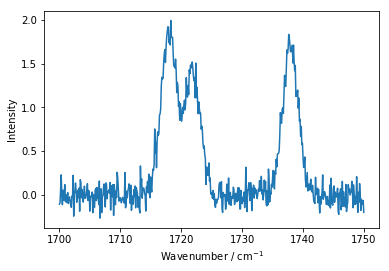

In [12]:
#Task 3 answer:
plt.plot(wavenumber,Intensity)
plt.xlabel('Wavenumber / cm$^{-1}$')
plt.ylabel('Intensity')
plt.show()

One of the major drawbacks of the ```np.loadtxt()``` approach is that numpy throws a major wobbler if your file contains non-numerical entries (<i>e.g.</i> column headers). If you know that your file has column headers you can include the optional argument ```skiprows=n``` which tells numpy not to import the first <i>n</i> rows of the input file.

<div class=warn>
    
### <font >Task 4:</font>
Attempt to read in the file 'deviousHeaders.csv' (located in the 'STUFF' folder) and see what happens...

In [13]:
#Task 4 answer:
np.loadtxt('./STUFF/deviousHeaders.csv',delimiter=',')

ValueError: could not convert string to float: 'Wavenumber'

<div class=warn>
    
### <font >Task 5:</font>
Repeat the above, but include the optional argument ```skiprows=1```.

Plot the data as in task 3.

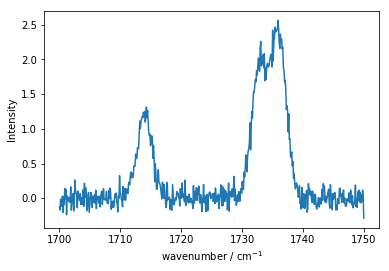

In [14]:
#Task 5 answer:
#Load data
data=np.loadtxt('./STUFF/deviousHeaders.csv',delimiter=',',skiprows=1)

wavenumber=data[:,0]
Intensity=data[:,1]

plt.plot(wavenumber,Intensity)
plt.xlabel('wavenumber / cm$^{-1}$')
plt.ylabel('Intensity')

plt.show()

## 1.2. Exporting Plots
Oftentimes you want to include a copy of your graph in a report or presentation. Thankfully this is simple to do in Matplotlib. All we need to do is include a single new command in our code:

```plt.savefig('filename.extension')```

The plot can be exported in several different formats by simply changing the ```.extension``` text. The two most common formats probably are PDF (```.pdf```) and PNG (```.png```). PDF files are vector (line) based, and as such can be manually scaled without loss of quality (and can also be extensively edited in programs such as Adobe Illustrator or Affinity Designer), while PNG files are pixel based and cannot have their size changed without reducing image quality - to test this, zoom in on pdf and png images and see what happens... 

### Important note:
You must run ```plt.savefig(...)``` before a ```plt.show()``` command or your exported file will be empty picture. Once the image is printed to screen it is cleared from memory.

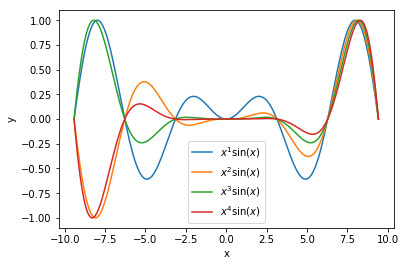

In [15]:
#Exporting plot example

#generate x data using numpy linspace command 
x=np.linspace(-3*np.pi,3*np.pi,200) #generate 200 evenly-spaced data points between -3 pi and 3 pi inclusive

#Use a For loop to automatically generate labelled plots of x^n sin(x) for n=1,2,3, and 4

for n in range(1,5): #the last value isn't included in the loop
    y=x**n * np.sin(x)
    y/=max(y) #Scales the graphs to a maximum of 1
    plt.plot(x,y,label='$x^{}\sin(x)$'.format(n)) #.format(n) sticks the current value for n into the space defined by the curly brace

plt.legend()
plt.xlabel("x")
plt.ylabel("y")

#Save the figure as both a pdf and png file, where we have manually defined the resolution of the png file
plt.savefig('Export_example.pdf')
plt.savefig('Export_example.png',dpi=400)
plt.show()

<div class=warn>

### <font >Task 6:</font>
    
Using the code above as a guide (i.e. copy and paste the bits you need and modify where appropriate), prepare and export plots of $y=\cos(nx)$ over the range $x=-\pi/2$ to $x=\pi/2$ and for n=1,2,3, and 4. Save your plots as a pdf file, and as png images with resolutions of 40 dpi and 400 dpi.

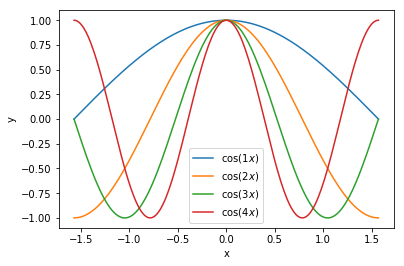

In [17]:
#Task 6 answer:
#Exporting plot example

#generate x data using numpy linspace command 
x=np.linspace(-np.pi/2,np.pi/2,200) #generate 200 evenly-spaced data points between -pi/2 and pi/2 inclusive

#Use a For loop to automatically generate labelled plots of x^n Cos(x) for n=1,2,3, and 4

for n in range(1,5): #the last value isn't included in the loop
    y=np.cos(n*x)
    y/=max(y) #Scales the graphs to a maximum of 1
    plt.plot(x,y,label='$\cos({}x)$'.format(n)) #.format(n) sticks the current value for n into the space defined by the curly brace

plt.legend()
plt.xlabel("x")
plt.ylabel("y")

#Save the figure as both a pdf and png file, where we have manually defined the resolution of the png file
plt.savefig('Export_example_task.pdf')
plt.savefig('Export_example_task_40.png',dpi=40)
plt.savefig('Export_example_task_400.png',dpi=400)
plt.show()

# 2. Advanced Plotting
The basic plotting introduced above is excellent for rapidly producing graphs; however, it has limited functionality. To make our plots more customisable we need to use a slightly more complex set of instructions. This advanced plotting makes use of an <i>object-oriented approach</i>, and requires us to think about a plot in terms of a <i>figure object</i> to which we attach a series of <i>axes objects</i>. Modification of these axes objects (which include things like the plots themselves, axis labels, gridlines, <i>etc.</i>) then allows us to customise the figures to our liking.

An example of what can be achieved using this object oriented approach is shown below (taken from C Hill, <i>Learning Scientific Programming With Python</i>, Cambridge University Press, Cambridge, 2015.)

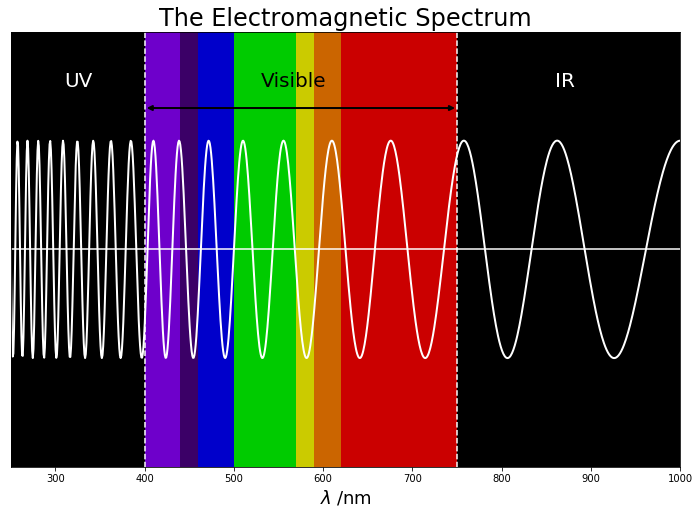

In [18]:
# wavelength range, nm
lmin,lmax=250,1000
x=np.linspace(lmin,lmax,1000)
#A wave with smoothly increasing wavelength
wv=(np.sin(10*np.pi*x / (lmax+lmin-x)))[::-1]

#Set up the plot elements
fig,ax=plt.subplots(figsize=(12,8))

ax.patch.set_facecolor('black')
ax.plot(x,wv,c='w',lw=2)
ax.set_xlim(250,1000)
ax.set_ylim(-2,2)

#Label and delimit the different regions of the electromagnetic spectrum
ax.text(310,1.5,'UV',color='w',fontdict={'fontsize':20})
ax.text(530,1.5,'Visible',color='k',fontdict={'fontsize':20})
ax.annotate('',(400,1.3),(750,1.3),arrowprops={'arrowstyle':'<|-|>','color':'k','lw':2})
ax.text(860,1.5,'IR',color='w',fontdict={'fontsize':20})
ax.axvline(400,-2,2,c='w',ls='--')
ax.axvline(750,-2,2,c='w',ls='--')

#Horizontal "axis" across the centre of the wave
ax.axhline(c='w')

#Remove the y-axis ticks and labels; label the x-axis
ax.yaxis.set_visible(False)
ax.set_xlabel('$\lambda\;/\mathrm{nm}$',fontsize=18)

#Add a title to the figure
ax.set_title('The Electromagnetic Spectrum',fontsize=24)

#Finally, add some colourful rectangles representing a rainbow in
#the visible region of the spectrum

#Dictionary mapping of wavelength regions (nm) to approximate RGB values
rainbow_rgb={(400,440):'#8b00ff',(440,460):'#4b0082',(460,500):'#0000ff',
            (500,570):'#00ff00',(570,590):'#ffff00',(590,620):'#ff7f00',
            (620,750):'#ff0000'}
for wv_range, rgb in rainbow_rgb.items():
    ax.axvspan(*wv_range,color=rgb,ec='none',alpha=0.8)

plt.show()

The above code box highlights several important points:
* The command ```fig,ax=plt.subplots()``` simultaneously creates both a figure object and an axes object.
* The figure object is our <i>top-level</i> object, to which all other elements of the plot are attached. We can add an optional argument ```figsize=(width, height)``` to specify the size of the plot (in inches unfortunately), very handy to create png figures of the correct size straight away rather than rescaling them later.
* The axes object is the one we use to actually specify the elements of a plot, including the axes, tick-marks, figure labels, plot lines/markers, <i>etc.</i>
* Plot elements are added to the axes object using the code ```ax.element```, <i>e.g.</i> ```ax.plot(xdata,ydata)``` is used to plot our data,```ax.text(x-position,y-position,'text')``` creates text in the plot.
* Axis limits and labels, <i>etc.</i> can be changed using the ```ax.set_``` command, <i>e.g.</i> ```ax.set_xlim(min,max)``` sets the range of the x-axis, ```ax.set_xlabel('text')``` creates the label axes.

<div class=warn>
    
### <font >Task 7:</font>

Use the advanced plotting method outlined above to create a plots of $y=\sin^{2}(x)$ and $y=\sin^{3}(x)$ with the settings outlined below:

* Plot these functions over the range $0-4\pi$. 
* Set the size of the figure to be 10 inches by 3 inches
* Include axis labels and a legend (plot line legends are still defined by adding a ```label``` attribute to the ```plt.plot``` function call, but the legend itself will not appear unless ```legend``` is called on the plot ```Axes``` object - <i>e.g.</i> with an ```ax.legend()``` command).
* Add a title to your plot using ```ax.set_title(YourTitle)```.

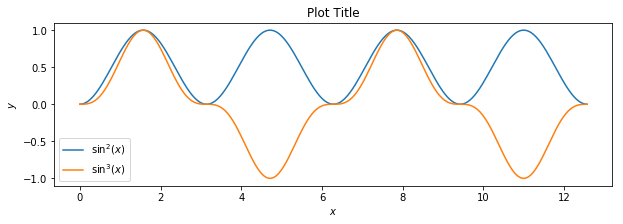

In [19]:
#Task 7 answer:
x=np.linspace(0,4*np.pi,200)
y=(np.sin(x))**2
y1=(np.sin(x))**3

fig,ax=plt.subplots(figsize=(10,3))
ax.plot(x,y,label='$\sin^{2}(x)$')
ax.plot(x,y1,label='$\sin^{3}(x)$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.set_title('Plot Title')
plt.show()

## 2.1. Multiple Subplots
The advanced plotting approach allows us to create figures with more than one subplot (<i>i.e.</i> more than one ```Axes``` object). To do this, we need to add two new arguments, ```nrows``` and ```ncols``` to ```plt.subplots()```.  For example, a figure consisting of 2 rows of three columns (6 subplots in total) can be created using the following code:

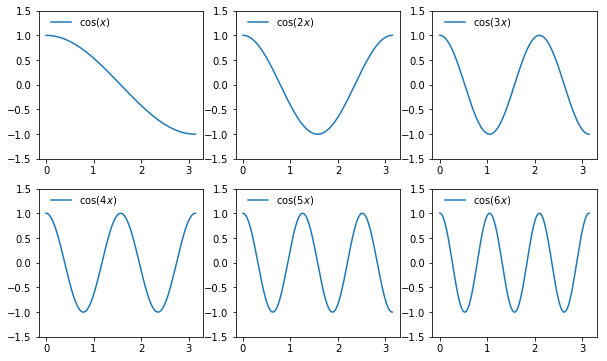

In [20]:
#Multiple subplot example
#Define our x-axis range
x=np.linspace(0,np.pi,200)

#create six plots
y1=np.cos(x)
y2=np.cos(2*x)
y3=np.cos(3*x)
y4=np.cos(4*x)
y5=np.cos(5*x)
y6=np.cos(6*x)

#create six axes objects, and arrange them as a 3x2 array
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,6))

#Assign names to each of the axes objects
ax1=axes[0,0] #top left subplot - remember that python always counts from 0
ax2=axes[0,1] #top middle subplot
ax3=axes[0,2] #top right subplot
ax4=axes[1,0] #bottom left subplot
ax5=axes[1,1] #bottom middle subplot
ax6=axes[1,2] #bottom right subplot

#Plot all the things!
ax1.plot(x,y1,label='$\cos(x)$') #generates a plot of x vs y1 within the object 'ax1'
ax2.plot(x,y2,label='$\cos(2x)$')
ax3.plot(x,y3,label='$\cos(3x)$')
ax4.plot(x,y4,label='$\cos(4x)$')
ax5.plot(x,y5,label='$\cos(5x)$')
ax6.plot(x,y6,label='$\cos(6x)$')

#make space for the plot legends
ax1.set_ylim(-1.5,1.5)
ax2.set_ylim(-1.5,1.5)
ax3.set_ylim(-1.5,1.5)
ax4.set_ylim(-1.5,1.5)
ax5.set_ylim(-1.5,1.5)
ax6.set_ylim(-1.5,1.5)

#Add legends to each of the plots. Optional argument 'frameon=False' removes the border (because it looks naff),
#and 'loc=(xposition,yposition)' allows us to control where the legend goes.
ax1.legend(frameon=False,loc=(0.05,0.85))
ax2.legend(frameon=False,loc=(0.05,0.85))
ax3.legend(frameon=False,loc=(0.05,0.85))
ax4.legend(frameon=False,loc=(0.05,0.85))
ax5.legend(frameon=False,loc=(0.05,0.85))
ax6.legend(frameon=False,loc=(0.05,0.85))

plt.show()

Typing all of the above out is extremely tedious! We could, of course, have used loops to generate the above figure using far less code. Since all six plots have exactly the same plot ranges, we can further improve the appearance of this figure by allowing the x- and y-axes to be shared amongst the plots. This has the effect of only creating x-tick labels for the bottom row of subplots, and y-tick labels for the left hand column:

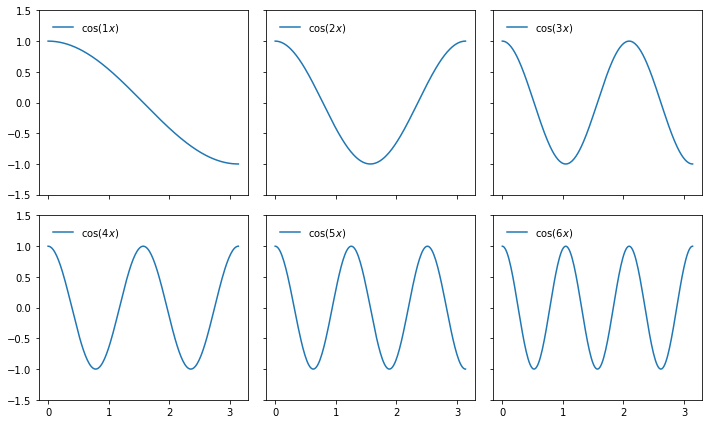

In [21]:
#Multiple subplot example 2 - Huzzah for loops

#Define our x-axis range
x=np.linspace(0,np.pi,200)

#Create our 2x3 array of subplots
nrows=2
ncols=3
fig,axes=plt.subplots(nrows,ncols,figsize=(10,6),sharex=True,sharey=True)

#Loop over the columns of the first row, then the columns of the second row
for i in range(nrows):
    for j in range(ncols):
        #1st row (defined by i=0) will contain the plots with n-values of 1-3 (=j+1)
        if i==0:
            n=j+1
            
        #2nd row defined by i=1, has n-values of 4-6 (=j+4)
        elif i==1:
            n=j+4
            
        #reference each axes object in turn within the loop, and plots the appropriate functions
        ax=axes[i,j]
        ax.plot(x,np.cos(n*x),label='$\cos({}x)$'.format(n))
        ax.set_ylim(-1.5,1.5)
        ax.legend(frameon=False,loc=(0.05,0.85))
       
fig.tight_layout() #Stops the subplots running into each other

plt.show()

<div class=warn>
    
### <font >Task 8:</font>

Create a 2$\times$2 array of subplots, and plot the first four members of the series $y=x^{n}\sin(x)$ over the range $x=-3\pi$ to $x=3\pi$. Make sure to include plot legends. See if you can incorporate the following features into your code:
* Create the axes objects and plots using loop structures
* Share the $x-$ and $y-$ axes amongst the plots. <b>Hint:</b> you will need to scale the plots to make this work properly.

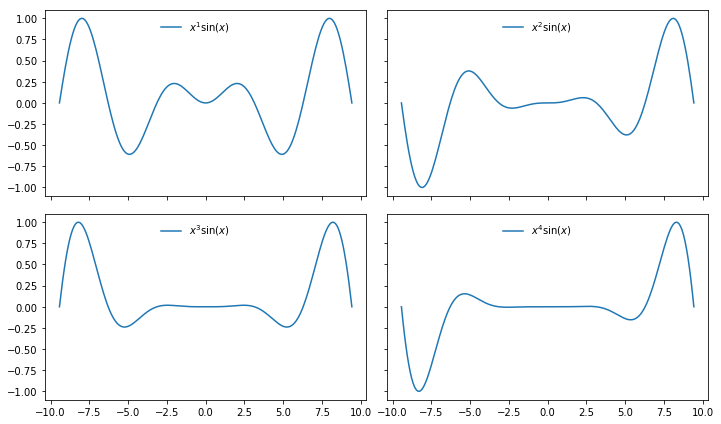

In [22]:
#Task 8 answer:
x=np.linspace(-3*np.pi,3*np.pi,200)
nrows=2
ncols=2
fig,axes=plt.subplots(nrows,ncols,figsize=(10,6),sharex=True,sharey=True)
for i in range(nrows):
    for j in range(ncols):
        if i==0:
            n=j+1
        elif i==1:
            n=j+3
        
        
        ax=axes[i,j]
        y=x**n*np.sin(x)
        y/=max(y)
        ax.plot(x,y,label='$x^{}\sin(x)$'.format(n))
        ax.legend(frameon=False,loc=(0.35,0.85))
    
fig.tight_layout()
plt.show()

So far we have focussed on the situation where each of the subplots have identical plot ranges. This does not have to be the case. We can use the ```axes.set_xlim()``` and ```axes.set_ylim()``` commands to independently scale the axis ranges. This can be useful if we want to focus on a region of interest. For example, we can easily 'zoom in' on the central peak of the sinc function (where $\textrm{sinc}(x)=\frac{\sin(x)}{x}$):

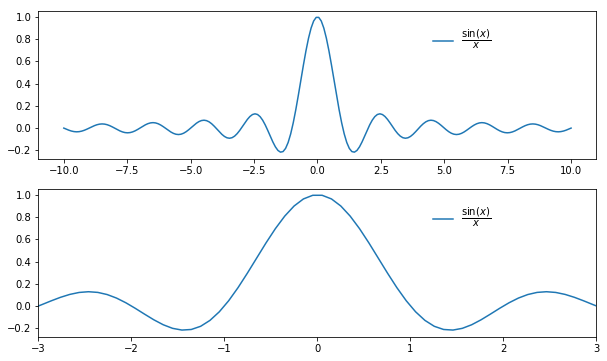

In [23]:
#Different plot limits example:
x=np.linspace(-10,10,200)
y=np.sinc(x)

#create a 2x1 array of plots and create two axes objects
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,6))
ax0=axes[0] #only one index array is required, since the column value has to be 0
ax1=axes[1] #and attempting to specify one will generate an error - give it a go

#plot the function over the full x-axis range
ax0.plot(x,y,label=('$\\dfrac{\sin(x)}{x}$'))

#'zoom in' on the central peak
ax1.plot(x,y,label=('$\\dfrac{\sin(x)}{x}$'))
ax1.set_xlim(-3,3)

ax0.legend(frameon=False,loc=(0.7,0.7))
ax1.legend(frameon=False,loc=(0.7,0.7))
plt.show()

<div class=warn>
    
### <font >Task 9:</font>
Consider the following series of irreversible chemical reactions:
$$[A]\xrightarrow{k_{1}}[B]\xrightarrow{k_{2}}[C]$$

These rate equations can be solved analytically. If we assume that at time $t=0$, $[A]=[A]_{0}$, and $[B]=[C]=0$, then the time dependent concentrations of $A,\,B$ and $C$ are given by:

$$[A]=[A]_{0}\exp\left(-k_{1}t\right)$$


$$[B]=\frac{k_{1}[A]_{0}}{k_{2}-k_{1}}\left\{\exp\left(-k_{1}t\right)-\exp\left(-k_{2}t\right)\right\}$$

$$[C]=\left\{1+\frac{k_{1}\exp\left(-k_{2}t\right)-k_{2}\exp\left(-k_{1}t\right)}{k_{2}-k_{1}}\right\}[A]_{0}$$

When $k_{1}>>k_{2}$, all of $A$ present initally is rapidly converted to $B$, which in turn slowly converts to $C$. We say that the second step is rate-determining. 

Prepare plots of the time-dependent populations of $A,\,B$ and $C$ over the range $t=0-10$ s. Use the following parameters:
$$\begin{align*}
    [A]_{0}&=1\,\textrm{mol dm}^{-3}\\
    k_{1}&=40\,\textrm{s}^{-1}\\
    k_{2}&=0.5\,\textrm{s}^{-1}
\end{align*}$$
Manually adjust the x-axis scale of the second plot to clearly highlight the rapid $A\rightarrow B$ conversion (you may have to include more datapoints to get a smooth curve). As always, make sure you include plot legends, and label your axes. 

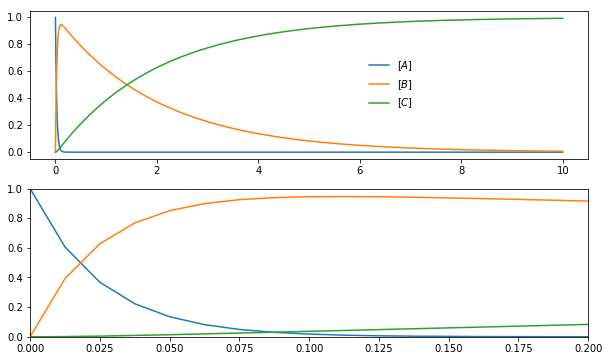

In [36]:
#Task 9 answer:
t=np.linspace(0,10,800)
k1=40
k2=0.5


conc_A=np.exp(-k1*t)
conc_B=(k1/(k2-k1))*(np.exp(-k1*t)-np.exp(-k2*t))
conc_C=1+(k1*np.exp(-k2*t)-k2*np.exp(-k1*t))/(k2-k1)

fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,6))
ax0=axes[0]
ax1=axes[1]

ax0.plot(t,conc_A,label=('$[A]$'))
ax0.plot(t,conc_B,label=('$[B]$'))
ax0.plot(t,conc_C,label=('$[C]$'))

ax1.plot(t,conc_A)
ax1.plot(t,conc_B)
ax1.plot(t,conc_C)
ax1.set_xlim(0,0.2)
ax1.set_ylim(0,1)

ax0.legend(frameon=False,loc=(0.6,0.3))
plt.show()

<div class=warn>
    
### <font >Task 10:</font>
Repeat task 6, but set $k_{1}=0.5\,\textrm{s}^{-1}$ and $k_{2}=40\,\textrm{s}^{-1}$ (<i>i.e.</i> the first step is now rate determining). In this situation, $B$ is consumed almost as soon as it is produced, and its population remains very low. Adjust the scale of the second plot to highlight the time-dependent population of $B$.

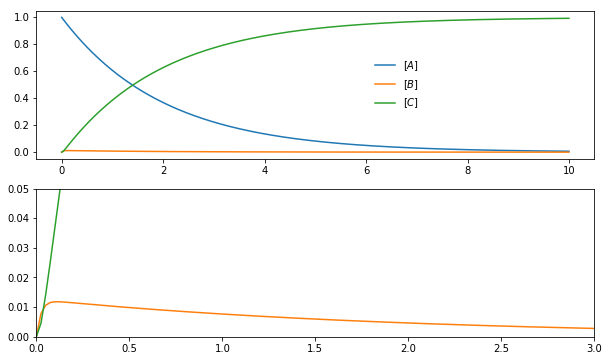

In [25]:
#Task 10 answer:
t=np.linspace(0,10,400)
k1=0.5
k2=40
conc_A=np.exp(-k1*t)
conc_B=(k1/(k2-k1))*(np.exp(-k1*t)-np.exp(-k2*t))
conc_C=1+(k1*np.exp(-k2*t)-k2*np.exp(-k1*t))/(k2-k1)
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,6))
ax0=axes[0]
ax1=axes[1]
ax0.plot(t,conc_A,label=('$[A]$'))
ax0.plot(t,conc_B,label=('$[B]$'))
ax0.plot(t,conc_C,label=('$[C]$'))

ax1.plot(t,conc_A)
ax1.plot(t,conc_B)
ax1.plot(t,conc_C)
ax1.set_xlim(0,3)
ax1.set_ylim(0,0.05)
ax0.legend(frameon=False,loc=(0.6,0.3))
plt.show()

# 3. A (very) brief introduction to Pandas
In section 1.1 we ran into issues importing data using ```np.loadtxt()``` when the file had non-numerical values contained within it (<i>e.g.</i> column headers). We were able to work around this problem by including the additional argument ```skiprows=1```. Sometimes however it is nice to be able to view the imported data with these column labels intact - much like how Excel handles imported data.

The [Pandas](https://pandas.pydata.org) module replicates much of Excels functionality, and interfaces very nicely with Matplotlib. As always, in order to use pandas we first have to import it:

In [26]:
import pandas as pd

Once Pandas is imported we can use it to open one of our IR data files:

In [27]:
#Import the 'deviousHeaders.csv' file used in Tasks 4 and 5
Data=pd.read_csv('./STUFF/deviousHeaders.csv')

#View the first 5 lines of the file
Data.head()

,Wavenumber,Intensity
0,1700.000000,-0.124691
1,1700.097847,-0.169755
2,1700.195695,-0.013481
3,1700.293542,-0.098481
4,1700.391389,-0.116429


Pandas automatically splits our data into columns, and we can view each column using the command ```Data['ColumnHeader']```:

In [28]:
#View columns of data in Pandas
Data['Wavenumber']

0      1700.000000
1      1700.097847
2      1700.195695
3      1700.293542
4      1700.391389
5      1700.489237
6      1700.587084
7      1700.684932
8      1700.782779
9      1700.880626
10     1700.978474
11     1701.076321
12     1701.174168
13     1701.272016
14     1701.369863
15     1701.467710
16     1701.565558
17     1701.663405
18     1701.761252
19     1701.859100
20     1701.956947
21     1702.054795
22     1702.152642
23     1702.250489
24     1702.348337
25     1702.446184
26     1702.544031
27     1702.641879
28     1702.739726
29     1702.837573
          ...     
482    1747.162427
483    1747.260274
484    1747.358121
485    1747.455969
486    1747.553816
487    1747.651663
488    1747.749511
489    1747.847358
490    1747.945205
491    1748.043053
492    1748.140900
493    1748.238748
494    1748.336595
495    1748.434442
496    1748.532290
497    1748.630137
498    1748.727984
499    1748.825832
500    1748.923679
501    1749.021526
502    1749.119374
503    1749.

We can also plot the data in the same manner:

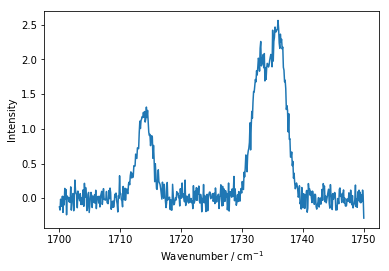

In [29]:
fig,ax=plt.subplots()

#Plot Intensity vs. wavenumber
ax.plot(Data['Wavenumber'],Data['Intensity'])
ax.set_xlabel('Wavenumber / cm$^{-1}$')
ax.set_ylabel('Intensity')

plt.show()

<div class=warn>
    
### <font >Task 11:</font>
The file ```CaroteneData.csv``` (once again located in the STUFF folder) contains the UV/vis spectra of three carotenoid molecules, $\beta$-carotene (from carrots), Lyopene (tomatoes), and lutein (spinach). Use Pandas to open this file and view the first five lines.

In [30]:
#Task 11 answer:
Data=pd.read_csv('./STUFF/CaroteneData.csv')
Data.head()

,CarrotLambda,CarrotAbs,TomatoLambda,TomatoAbs,SpinachLambda,SpinachAbs
0,650.014709,0.015401,650.014709,0.041500,650.014709,0.063159
1,648.992493,0.015214,648.992493,0.041202,648.992493,0.059935
2,648.006470,0.015553,648.006470,0.040673,648.006470,0.057452
3,646.983582,0.016196,646.983582,0.040957,646.983582,0.054962
4,645.997009,0.016062,645.997009,0.041076,645.997009,0.052751


<div class=warn>
    
### <font >Task 12:</font>
Plot the three absorption spectra over the wavelength range 350 nm $\leq\lambda\leq$ 550 nm as seperate graphs (use the subplots capability of Matplotlib).

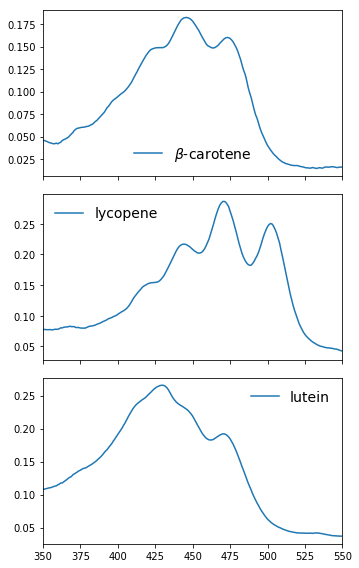

In [31]:
#Task 12 answer:

fig,axes=plt.subplots(nrows=3,ncols=1,sharex=True,figsize=(5,8))
ax0=axes[0]
ax0.plot(Data['CarrotLambda'],Data['CarrotAbs'],label=('$\\beta$-carotene'))
ax0.legend(frameon=False,fontsize=14)
ax0.set_xlim(350,550)

ax1=axes[1]
ax1.plot(Data['TomatoLambda'],Data['TomatoAbs'],label=('lycopene'))
ax1.legend(frameon=False,fontsize=14)
ax1.set_xlim(350,550)

ax2=axes[2]
ax2.plot(Data['SpinachLambda'],Data['SpinachAbs'],label=('lutein'))
ax2.legend(frameon=False,fontsize=14)
ax2.set_xlim(350,550)

fig.tight_layout()
plt.show()

# 4. Further information
This notebook has barely scratched the surface of the full capabilities of Matplotlib. In addition to the simple plots highlighted above, we can also use matplotlib to generate several other types of graph. Further examples (and the code used to generate them) can be found in the [Matplotlib gallery](https://matplotlib.org/gallery.html).
## 4.1. Scatter plots

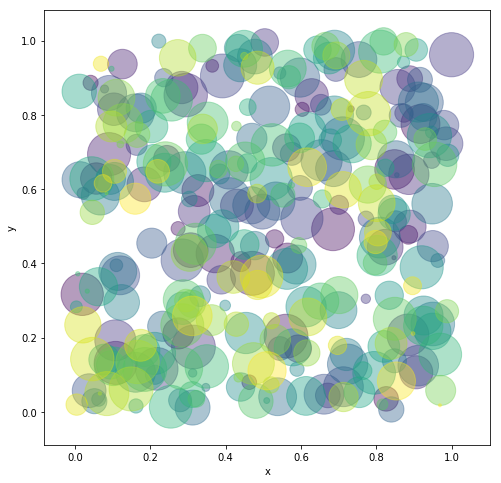

In [43]:
#Scatter plot example
#Generate random x and y data
x = np.random.random(300)
y = np.random.random(300)

#randomise the size of the scatter points
scale=np.random.random(300)*2000

#create the plot
fig,ax=plt.subplots(figsize=(8,8))
colours=range(len(x)) #Give each point an arbitrary colour
ax.scatter(x,y,s=scale,c=colours,alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

## 4.2. Contour plots

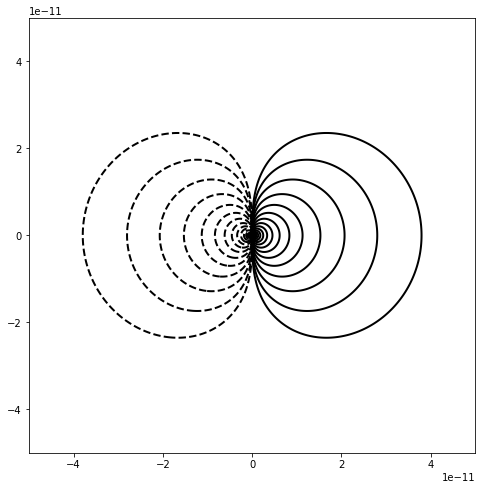

In [33]:
#Taken from C Hill, Learning Scientific Programming With Python, Cambridge University Press, Cambridge, 2015.

#The electrostatic potential of a point dipole
#Dipole charge (C), Permittivity of free space (F.m-1)
q,eps0=1.602e-19,8.854e-12
#Dipole +q, -q distance (m) and a convenient combination of parameters
d=1.e-12
k=1/4/np.pi/eps0*q*d

#Cartesian axis system with origin at the dipole (m)
X=np.linspace(-5e-11,5e-11,1000)
Y=X.copy()
X,Y=np.meshgrid(X,Y)

#Dipole electrostatic potential (V), using point dipole approximation
Phi=k*X/np.hypot(X,Y)**3

fig,ax=plt.subplots(figsize=(8,8))
#Draw contours at values of Phi given by levels
levels=np.array([10**pw for pw in np.linspace(0,5,20)])
levels=list(np.sort(-levels))+list(levels)
#Monochrome plot of potential
ax.contour(X,Y,Phi,levels=levels,colors='k',linewidths=2)
plt.show()

## 4.3. Heatmaps

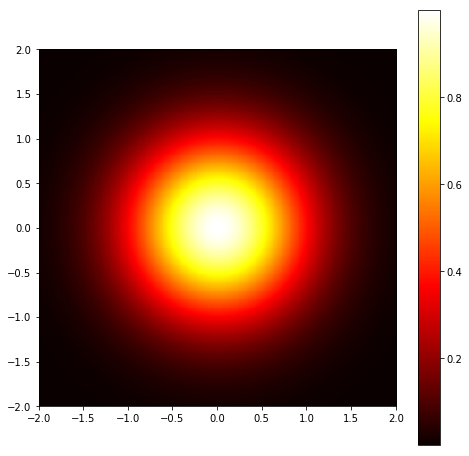

In [34]:
#Heatmap of a two-dimensional Gaussian function exp(-(x^2+y^2))
import matplotlib.cm as cm

L,n=2,400
x=np.linspace(-L,L,n)
y=x.copy()
X,Y=np.meshgrid(x,y)
Z=np.exp(-(X**2+Y**2))

fig,ax=plt.subplots(figsize=(8,8))
im=ax.imshow(Z,cmap=cm.hot,extent=[-2,2,-2,2])
plt.colorbar(im)
plt.show()

## 4.4. 3D plots
Flashy, but probably of limited use for most applications

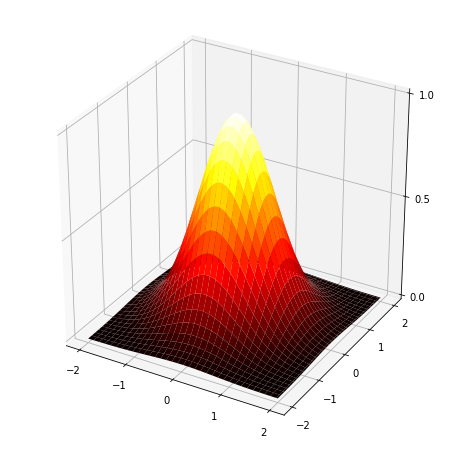

In [35]:
#3D plot of a two-dimensional Gaussian function exp(-(x^2+y^2))
#We need to import some more packages for this to work...
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

L,n=2,400
x=np.linspace(-L,L,n)
y=x.copy()
X,Y=np.meshgrid(x,y)
Z=np.exp(-(X**2+Y**2))

fig,ax=plt.subplots(subplot_kw={'projection':'3d'},figsize=(8,8))
ax.plot_surface(X,Y,Z,rstride=12,cstride=12,cmap=cm.hot)
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])
ax.set_zticks([0,0.5,1])

plt.show()